In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
dfM = pd.read_csv('Datos_limpios_Mexico.csv')
dfM.drop(columns=['Unnamed: 0'], inplace=True)
dfM.drop(columns=['last_scraped', 'source', 'name', 'host_since', 'host_about', 'host_location', 'description', 'host_name', 'first_review', 'last_review'], inplace=True)



In [3]:
dfM.head()
dfM.info()
#droppear last_scraped droppear source name host_since host_about host_location description host_name first_revie last_review
#dfM.drop(columns=['last_scraped', 'source', 'name', 'host_since', 'host_about', 'host_location', 'description', 'host_name', 'first_review', 'last_review'], inplace=True)
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_response_time              26582 non-null  object 
 1   host_response_rate              26582 non-null  object 
 2   host_acceptance_rate            26582 non-null  object 
 3   host_is_superhost               26582 non-null  object 
 4   host_verifications              26582 non-null  object 
 5   host_has_profile_pic            26582 non-null  object 
 6   host_identity_verified          26582 non-null  object 
 7   neighbourhood_cleansed          26582 non-null  object 
 8   property_type                   26582 non-null  object 
 9   room_type                       26582 non-null  object 
 10  amenities                       26582 non-null  object 
 11  has_availability                26582 non-null  object 
 12  instant_bookable                

## Quitar signos

In [4]:
dfM['host_acceptance_rate'] = dfM['host_acceptance_rate'].str.replace('%', '').astype(float)

In [6]:
unico_acceptance=np.unique(dfM['host_acceptance_rate'])
unico_acceptance

array([  0.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        13.,  14.,  15.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,  24.,
        25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,
        36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,
        47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,
        58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,
        69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,
        80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,
        91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99., 100.])

In [5]:
dfM['host_response_rate'] = dfM['host_response_rate'].str.replace('%', '').astype(float)


In [3]:
unico_acceptance=np.unique(dfM['host_response_rate'])
unico_acceptance

array(['0%', '10%', '100%', '11%', '13%', '14%', '16%', '17%', '18%',
       '19%', '20%', '22%', '23%', '25%', '27%', '29%', '30%', '33%',
       '36%', '38%', '39%', '4%', '40%', '43%', '46%', '47%', '48%',
       '49%', '5%', '50%', '53%', '54%', '55%', '56%', '57%', '58%',
       '60%', '61%', '62%', '63%', '64%', '66%', '67%', '69%', '70%',
       '71%', '72%', '73%', '74%', '75%', '76%', '77%', '78%', '79%',
       '8%', '80%', '81%', '82%', '83%', '84%', '85%', '86%', '87%',
       '88%', '89%', '9%', '90%', '91%', '92%', '93%', '94%', '95%',
       '96%', '97%', '98%', '99%'], dtype=object)

## Convertir a dicotomicas

In [8]:
unico_acceptance=np.unique(dfM['host_response_rate'])
unico_acceptance

array([  0.,   4.,   5.,   8.,   9.,  10.,  11.,  13.,  14.,  16.,  17.,
        18.,  19.,  20.,  22.,  23.,  25.,  27.,  29.,  30.,  33.,  36.,
        38.,  39.,  40.,  43.,  46.,  47.,  48.,  49.,  50.,  53.,  54.,
        55.,  56.,  57.,  58.,  60.,  61.,  62.,  63.,  64.,  66.,  67.,
        69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,
        80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,
        91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99., 100.])

In [9]:
#saber la cantidad de cada respuesta 
dfM['host_response_rate'].value_counts()

host_response_rate
100.0    17583
94.0      3766
99.0      1106
0.0        567
90.0       559
         ...  
36.0         2
54.0         1
72.0         1
46.0         1
5.0          1
Name: count, Length: 76, dtype: int64

In [10]:
dfM['host_response_rate']=dfM['host_response_rate'].replace([100],"Respondio todas")
dfM['host_response_rate']=dfM['host_response_rate'].replace([ 0.,   4.,   5.,   8.,   9.,  10.,  11.,  13.,  14.,  16.,  17.,
        18.,  19.,  20.,  22.,  23.,  25.,  27.,  29.,  30.,  33.,  36.,
        38.,  39.,  40.,  43.,  46.,  47.,  48.,  49.,  50.,  53.,  54.,
        55.,  56.,  57.,  58.,  60.,  61.,  62.,  63.,  64.,  66.,  67.,
        69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,
        80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,
        91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.],"No respondio todas")
dfM['host_response_rate'].value_counts()

host_response_rate
Respondio todas       17583
No respondio todas     8999
Name: count, dtype: int64

In [ ]:
dfM['host_response_time'].value_counts()

In [11]:
unico1=np.unique(dfM['host_response_time'])
unico1

array(['a few days or more', 'within a day', 'within a few hours',
       'within an hour'], dtype=object)

In [ ]:
dfM['host_response_time']=dfM['host_response_time'].replace(['a few days or more', 'within a day', 'within a few hours'],"No in an hour")
dfM

In [ ]:
unico1=np.unique(dfM['host_verifications'])
unico1

In [ ]:
conteo_valores = dfM['host_verifications'].value_counts()
conteo_valores


In [ ]:
dfM['host_verifications']=dfM['host_verifications'].replace(["['email', 'phone']"],"Solo email y phone")
dfM['host_verifications']=dfM['host_verifications'].replace(["['email', 'phone', 'work_email']", "[]",
       "['email', 'work_email']", "['email']", "['phone', 'work_email']",
       "['phone']", "['work_email']"],"Diversas verificaciones")
dfM

In [ ]:
conteo_property = dfM['property_type'].value_counts()
conteo_property

In [ ]:
dfM['property_type'].value_counts()

In [11]:
#no entire rental
dfM['property_type']=dfM['property_type'].replace(['Boat', 'Campsite', 'Casa particular', 'Castle', 'Dome', 'Earthen home', 'Entire bungalow', 'Entire cabin', 'Entire chalet', 'Entire condo', 'Entire cottage', 'Entire guest suite', 'Entire guesthouse', 'Entire home', 'Entire home/apt', 'Entire hostel', 'Entire in-law', 'Entire loft', 'Entire place', 'Entire serviced apartment', 'Entire townhouse', 'Entire vacation home', 'Entire villa', 'Farm stay', 'Holiday park', 'Hut', 'Private room', 'Private room in barn', 'Private room in bed and breakfast', 'Private room in bungalow', 'Private room in cabin', 'Private room in casa particular', 'Private room in castle', 'Private room in chalet', 'Private room in condo', 'Private room in cottage', 'Private room in dome', 'Private room in dorm', 'Private room in earthen home', 'Private room in farm stay', 'Private room in floor', 'Private room in guest suite', 'Private room in guesthouse', 'Private room in home', 'Private room in hostel', 'Private room in houseboat', 'Private room in hut', 'Private room in lighthouse', 'Private room in loft', 'Private room in minsu', 'Private room in nature lodge', 'Private room in pension', 'Private room in rental unit', 'Private room in resort', 'Private room in serviced apartment', 'Private room in shipping container', 'Private room in tent', 'Private room in tiny home', 'Private room in tower', 'Private room in townhouse', 'Private room in vacation home', 'Private room in villa', 'Room in aparthotel', 'Room in bed and breakfast', 'Room in boutique hotel', 'Room in casa particular', 'Room in hostel', 'Room in hotel', 'Room in serviced apartment', 'Shared room in bed and breakfast', 'Shared room in boutique hotel', 'Shared room in cabin', 'Shared room in casa particular', 'Shared room in condo', 'Shared room in dorm', 'Shared room in farm stay', 'Shared room in guest suite', 'Shared room in guesthouse', 'Shared room in home', 'Shared room in hostel', 'Shared room in hotel', 'Shared room in loft', 'Shared room in rental unit', 'Shared room in serviced apartment', 'Shared room in tent', 'Shared room in tiny home', 'Shared room in townhouse', 'Shipping container', 'Tent', 'Tiny home', 'Tower']
,"no entire rental")

In [ ]:
conteo_room = dfM['room_type'].value_counts()
conteo_room

In [ ]:
unico4=np.unique(dfM['room_type'])
unico4

In [ ]:
dfM['room_type']=dfM['room_type'].replace(['Hotel room', 'Private room', 'Shared room'],"No entire home")
dfM

In [ ]:
conteo_availability= dfM['availability_30'].value_counts()
conteo_availability

In [ ]:
dfM['availability_30']=dfM['availability_30'].replace([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],"15 dias o menos")
dfM['availability_30']=dfM['availability_30'].replace([16,17,18,19,20,21,22,23,24,25,26,27,28,29,30],"mayor a 15 dias")

In [ ]:
conteo_accommodates= dfM['accommodates'].value_counts()
conteo_accommodates

In [ ]:
dfM['accommodates']=dfM['accommodates'].replace([1.0,2.0,3.0],"Menor al promedio")
dfM['accommodates']=dfM['accommodates'].replace([4.0,5.0,6.0,7.0],"El promedio y mayores")

## Convertir variables de objeto a numericas

In [ ]:
unico2=np.unique(dfM['neighbourhood_cleansed'])
unico2

In [ ]:
# Crear una instancia de LabelEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Ajustar y transformar la columna 'neighbourhood_cleansed'
dfM['neighbourhood_cleansed_encoded'] = le.fit_transform(dfM['neighbourhood_cleansed'])+1

# Verificar el resultado
print(dfM[['neighbourhood_cleansed', 'neighbourhood_cleansed_encoded']])

In [13]:
#amenities
#room_type
# Crear una instancia de LabelEncoder
from sklearn.preprocessing import LabelEncoder

le4 = LabelEncoder()

# Ajustar y transformar la columna 'neighbourhood_cleansed'
dfM['amenities_encoded'] = le4.fit_transform(dfM['amenities'])+1

# Verificar el resultado
print(dfM[['amenities', 'amenities_encoded']])


                                               amenities  amenities_encoded
0      ["Free parking on premises", "Washer", "Wifi",...               3307
1      ["Iron", "Washer", "Wifi", "Host greets you", ...              14490
2      ["Iron", "Wifi", "Bathtub", "Refrigerator", "D...              15144
3      ["Iron", "Washer", "Outdoor furniture", "Wifi"...              12677
4      ["Iron", "Washer", "Outdoor furniture", "Wifi"...              12895
...                                                  ...                ...
26577  ["Wifi", "Heating", "Freezer", "Cleaning avail...              24095
26578  ["Shared patio or balcony", "Iron", "Outdoor f...              20626
26579  ["Shared patio or balcony", "Iron", "Outdoor f...              20628
26580  ["Shared patio or balcony", "Iron", "Outdoor f...              20630
26581  ["Free parking on premises", "Washer", "TV", "...               3237

[26582 rows x 2 columns]


## Convertir Dicotomicas a Numericas

In [14]:
#convertid a numerica host_is_superhost
dfM['host_is_superhost'] = dfM['host_is_superhost'].map({'t': 1, 'f': 0})

In [15]:
#host_has_profile_pic
dfM['host_has_profile_pic'] = dfM['host_has_profile_pic'].map({'t': 1, 'f': 0})

In [16]:
#host_identity_verified
dfM['host_identity_verified'] = dfM['host_identity_verified'].map({'t': 1, 'f': 0})

In [17]:
#has_availability
dfM['has_availability'] = dfM['has_availability'].map({'t': 1, 'f': 0})

In [18]:
#instant_bookable
dfM['instant_bookable'] = dfM['instant_bookable'].map({'t': 1, 'f': 0})

In [19]:
dfM['host_response_rate'] = dfM['host_response_rate'].map({'Respondio todas': 1, 'No respondio todas': 0})

In [20]:
dfM['host_response_time'] = dfM['host_response_time'].map({'within an hour': 1, 'No in an hour': 0})

In [21]:
dfM['host_verifications'] = dfM['host_verifications'].map({'Solo email y phone': 1, 'Diversas verificaciones': 0})


In [22]:
dfM['property_type'] = dfM['property_type'].map({'Entire rental unit': 1, 'no entire rental': 0})

In [23]:
dfM['room_type'] = dfM['room_type'].map({'Entire home/apt': 1, 'No entire home': 0})

In [ ]:
dfM['availability_30'] = dfM['availability_30'].map({'mayor a 15 dias': 1, '15 dias o menos': 0})

In [ ]:
dfM['accommodates'] = dfM['accommodates'].map({'El promedio y mayores': 1, 'Menor al promedio': 0})

## HEATMAP


In [24]:
#droppear columnas 0,4,7,8,9,10
dfM.drop(columns=[ 'neighbourhood_cleansed', 'amenities',], inplace=True)
#dfM.drop(columns=['number_of_reviews_l30d','availability_30','availability_60' , 'availability_90','availability_365'], inplace=True)


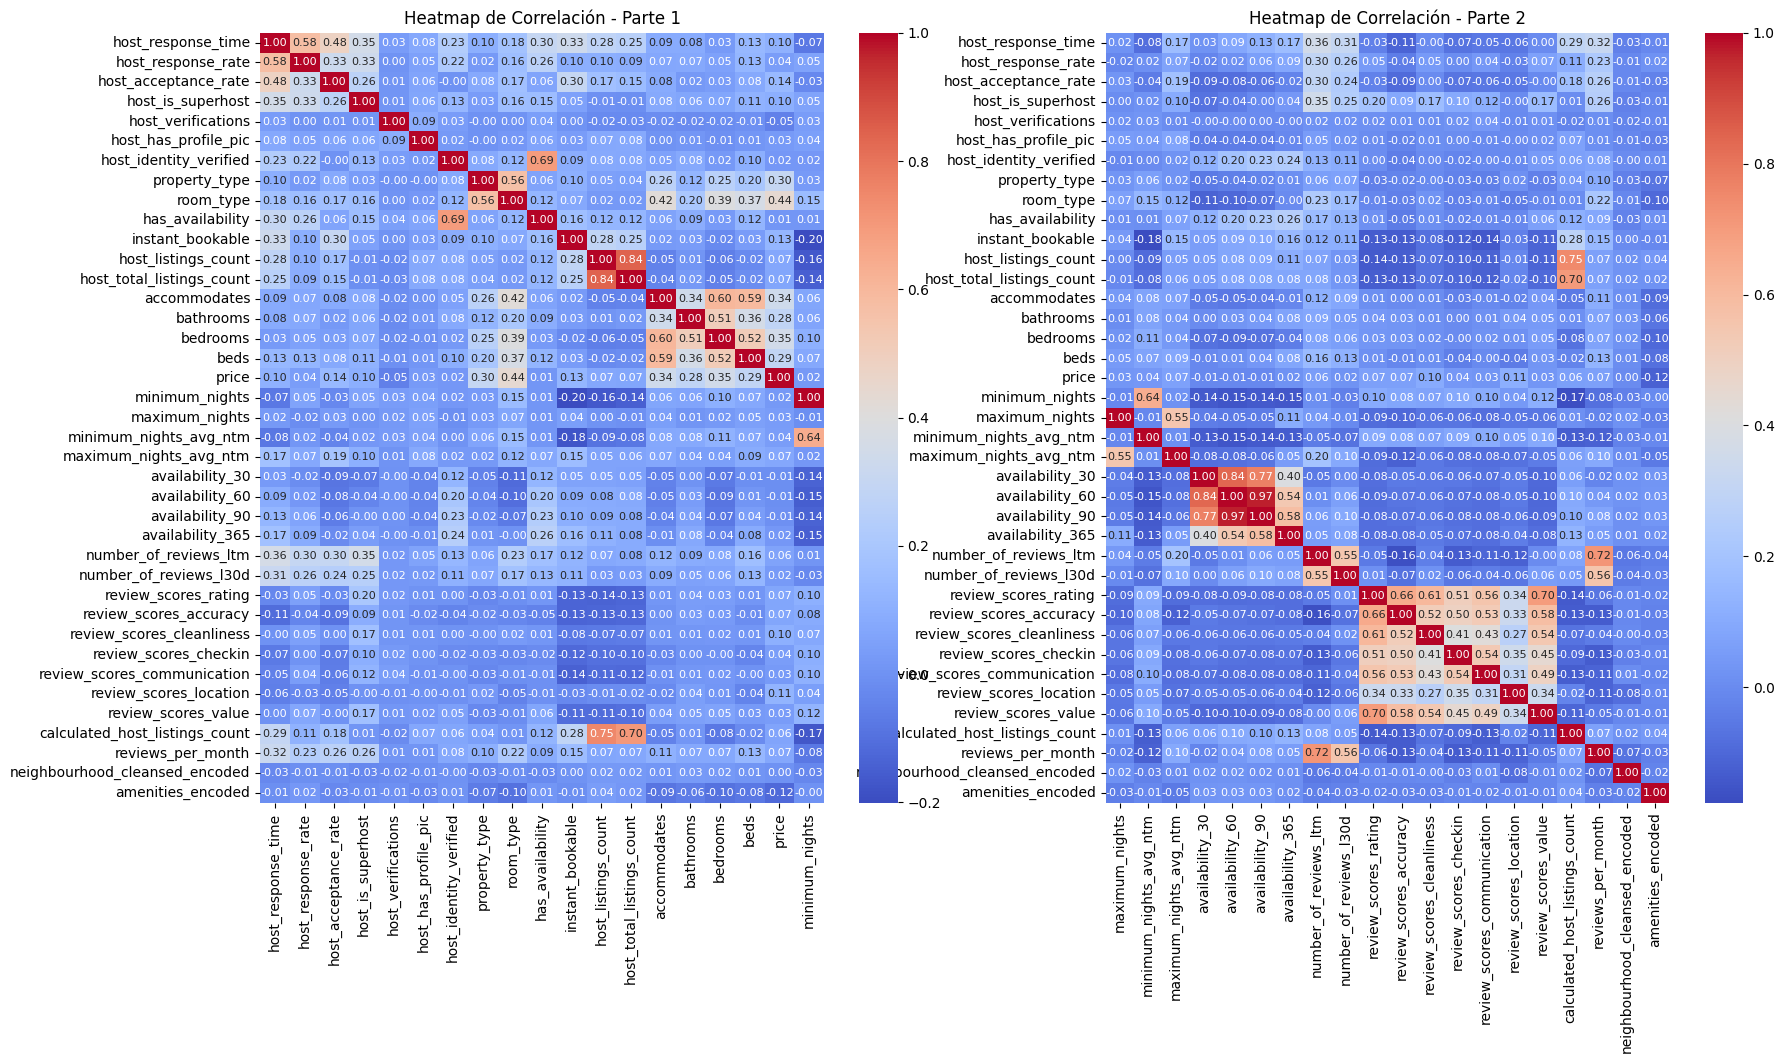

In [31]:
corr_matrix = dfM.corr()
num_columns = corr_matrix.shape[1]

# Dividir la matriz de correlación en dos partes
corr_matrix_1 = corr_matrix.iloc[:, :num_columns // 2]
corr_matrix_2 = corr_matrix.iloc[:, num_columns // 2:]
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(20, 10))  # Ajusta el tamaño según tus necesidades

# Heatmap para la primera mitad de la matriz de correlación
sns.heatmap(corr_matrix_1, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, ax=ax[0],annot_kws={"size": 8})
ax[0].set_title('Heatmap de Correlación - Parte 1')

# Heatmap para la segunda mitad de la matriz de correlación
sns.heatmap(corr_matrix_2, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, ax=ax[1],annot_kws={"size": 8})
ax[1].set_title('Heatmap de Correlación - Parte 2')

plt.show()

In [32]:
#crear un archivo csv del dfM
dfM.to_csv('Datos_limpios_Mexico_V3.csv', index=False)